In [139]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [140]:
url_main = 'http://api.census.gov/data/2018/abstcb'
url_columns = '?get=IMPACTWF_U,IMPACTWF_U_LABEL,NSFSZFI,NSFSZFI_LABEL,FIRMPDEMP,EMP'
url_focus = '&for=us:*'
url_key = f'&key={config.key}'
full_url = f'{url_main}{url_columns}{url_focus}{url_key}'
response = requests.get(full_url)

In [141]:
df = pd.read_json(response.text)
# Puts column labels in proper places
df.columns = df.iloc[0]
df.drop(index=0, inplace=True)
df['FIRMPDEMP'] = df['FIRMPDEMP'].astype(int)
df['EMP'] = df['EMP'].astype(int)

In [142]:
# dataframe with AI labels
ai = df[(df['IMPACTWF_U_LABEL'].str.contains('Artificial'))&(df['IMPACTWF_U_LABEL'].str.contains('number'))|(df['IMPACTWF_U_LABEL'].str.contains('Artificial'))&(df['IMPACTWF_U_LABEL'].str.contains('Total'))]
ai.head()

,IMPACTWF_U,IMPACTWF_U_LABEL,NSFSZFI,NSFSZFI_LABEL,FIRMPDEMP,EMP,us
1,T1E05D01,Artificial Intelligence: Increased number of w...,001,All firms,21214,4583984,1
2,T1E05D02,Artificial Intelligence: Decreased number of w...,001,All firms,8884,770426,1
3,T1E05D03,Artificial Intelligence: Did not change number...,001,All firms,111632,6516672,1
11,T1E05D99,Artificial Intelligence: Total Reporting,001,All firms,141731,11871082,1
75,T1E05D01,Artificial Intelligence: Increased number of w...,811,Firms with no employees,981,0,1


In [143]:
# all firms
all_firms = ai[ai['NSFSZFI_LABEL']=='All firms']
all_firms.reset_index(drop=True,inplace=True)
total = all_firms['FIRMPDEMP'].loc[3]
all_firms['percentage'] = ((all_firms['FIRMPDEMP']/total)*100).round(0)
all_firms.head()

C:\Users\amyyu\AppData\Local\Temp/ipykernel_1316/465566026.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_firms['percentage'] = ((all_firms['FIRMPDEMP']/total)*100).round(0)


,IMPACTWF_U,IMPACTWF_U_LABEL,NSFSZFI,NSFSZFI_LABEL,FIRMPDEMP,EMP,us,percentage
0,T1E05D01,Artificial Intelligence: Increased number of w...,001,All firms,21214,4583984,1,15.0
1,T1E05D02,Artificial Intelligence: Decreased number of w...,001,All firms,8884,770426,1,6.0
2,T1E05D03,Artificial Intelligence: Did not change number...,001,All firms,111632,6516672,1,79.0
3,T1E05D99,Artificial Intelligence: Total Reporting,001,All firms,141731,11871082,1,100.0


In [144]:
# no employees
no_emp = ai[ai['NSFSZFI_LABEL']=='Firms with no employees']
no_emp.reset_index(drop=True,inplace=True)
total = no_emp['FIRMPDEMP'].loc[3]
no_emp['percentage'] = ((no_emp['FIRMPDEMP']/total)*100).round(0)
no_emp.head()

C:\Users\amyyu\AppData\Local\Temp/ipykernel_1316/1502402500.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_emp['percentage'] = ((no_emp['FIRMPDEMP']/total)*100).round(0)


,IMPACTWF_U,IMPACTWF_U_LABEL,NSFSZFI,NSFSZFI_LABEL,FIRMPDEMP,EMP,us,percentage
0,T1E05D01,Artificial Intelligence: Increased number of w...,811,Firms with no employees,981,0,1,10.0
1,T1E05D02,Artificial Intelligence: Decreased number of w...,811,Firms with no employees,297,0,1,3.0
2,T1E05D03,Artificial Intelligence: Did not change number...,811,Firms with no employees,8213,0,1,87.0
3,T1E05D99,Artificial Intelligence: Total Reporting,811,Firms with no employees,9493,0,1,100.0


In [145]:
# 1 to 9 employees
one_to_nine = ai[ai['NSFSZFI_LABEL']=='Firms with 1 to 9 employees']
one_to_nine.reset_index(drop=True,inplace=True)
total = one_to_nine['FIRMPDEMP'].loc[3]
one_to_nine['percentage'] = ((one_to_nine['FIRMPDEMP']/total)*100).round(0)
one_to_nine.head()

C:\Users\amyyu\AppData\Local\Temp/ipykernel_1316/3672019129.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_to_nine['percentage'] = ((one_to_nine['FIRMPDEMP']/total)*100).round(0)


,IMPACTWF_U,IMPACTWF_U_LABEL,NSFSZFI,NSFSZFI_LABEL,FIRMPDEMP,EMP,us,percentage
0,T1E05D01,Artificial Intelligence: Increased number of w...,815,Firms with 1 to 9 employees,11477,50170,1,12.0
1,T1E05D02,Artificial Intelligence: Decreased number of w...,815,Firms with 1 to 9 employees,5545,18885,1,6.0
2,T1E05D03,Artificial Intelligence: Did not change number...,815,Firms with 1 to 9 employees,77868,245471,1,82.0
3,T1E05D99,Artificial Intelligence: Total Reporting,815,Firms with 1 to 9 employees,94888,314527,1,100.0


In [146]:
# 10 or more employees
ten_or_more = ai[ai['NSFSZFI_LABEL']=='Firms with 10 employees or more']
ten_or_more.reset_index(drop=True,inplace=True)
total = ten_or_more['FIRMPDEMP'].loc[3]
ten_or_more['percentage'] = ((ten_or_more['FIRMPDEMP']/total)*100).round(0)
ten_or_more.head()

C:\Users\amyyu\AppData\Local\Temp/ipykernel_1316/531930821.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten_or_more['percentage'] = ((ten_or_more['FIRMPDEMP']/total)*100).round(0)


,IMPACTWF_U,IMPACTWF_U_LABEL,NSFSZFI,NSFSZFI_LABEL,FIRMPDEMP,EMP,us,percentage
0,T1E05D01,Artificial Intelligence: Increased number of w...,857,Firms with 10 employees or more,8755,4533814,1,23.0
1,T1E05D02,Artificial Intelligence: Decreased number of w...,857,Firms with 10 employees or more,3042,751541,1,8.0
2,T1E05D03,Artificial Intelligence: Did not change number...,857,Firms with 10 employees or more,25550,6271200,1,68.0
3,T1E05D99,Artificial Intelligence: Total Reporting,857,Firms with 10 employees or more,37349,11556555,1,100.0


Text(0.5, 0, 'Percent')

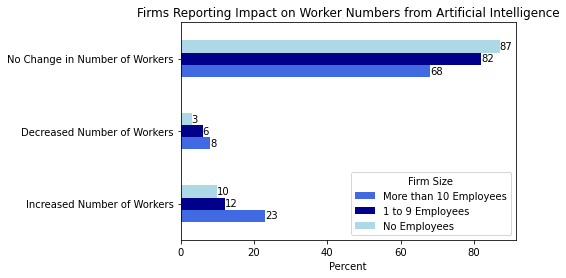

In [152]:
# index = ['Firms with no employees','Firms with 1 to 9 employees','Firms with 10 employees or more','All firms']
index = ['Increased Number of Workers','Decreased Number of Workers','No Change in Number of Workers']
large = []
for i in range(0,3):
    large.append(ten_or_more['percentage'].loc[i])
medium = []
for i in range(0,3):
    medium.append(one_to_nine['percentage'].loc[i])
none = []
for i in range(0,3):
    none.append(no_emp['percentage'].loc[i])

df = pd.DataFrame({'More than 10 Employees': large,
                   '1 to 9 Employees': medium,
                  'No Employees': none}, index=index)
colors = ['royalblue','darkblue','lightblue']
ax = df.plot.barh(color=colors)
for container in ax.containers:
    ax.bar_label(container)
ax.legend(title='Firm Size')
plt.title('Firms Reporting Impact on Worker Numbers from Artificial Intelligence')
plt.xlabel('Percent')